# Выбор локации для скважины


**Цель работы:**
построить модель, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 
- Расчитать средний запас предсказанного сырья и RMSE модели;
- Спрогнозировать среднюю прибыль, 95%-й доверительный интервал и риск убытков;
- После оценки рисков оставить регионы, в которых вероятность убытков меньше 2.5%. Выбирать регион с наибольшей средней прибылью.

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (информация о точ, что они означают отсутствует, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

### подключение необходходимых для дальнейшей работы библиотек, модулей, метрик

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy import stats as st

In [2]:
pd.options.mode.chained_assignment = None

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

### Загрузка данных и ознакомление

In [3]:
df1 = pd.read_csv('/datasets/geo_data_0.csv') #датафрейм для региона №1
df2 = pd.read_csv('/datasets/geo_data_1.csv') #датафрейм для региона №2
df3 = pd.read_csv('/datasets/geo_data_2.csv') #датафрейм для региона №3

Выведем в цикле для каждого региона первые пять строк датафрейма, общую информацию и проверим на наличие явных дубликатов

In [4]:
df_list = [df1, df2, df3] #создадим список
count = 1

for data_frame in df_list:
    print('\033[1m'+'Информация о данных для региона №', count)
    display(data_frame.head()) #первые пять строк
    data_frame.info() #общая информация
    print('Количество явных дубикатов =', data_frame.duplicated().sum()) #количество явных дубликатов
    count+=1
    print()

Информация о данных для региона № 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Количество явных дубикатов = 0

Информация о данных для региона № 2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Количество явных дубикатов = 0

Информация о данных для региона № 3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Количество явных дубикатов = 0



Гистограммы для данных по региону № 1


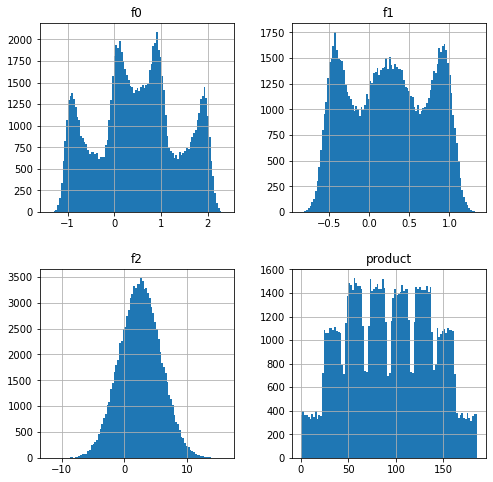

Гистограммы для данных по региону № 2


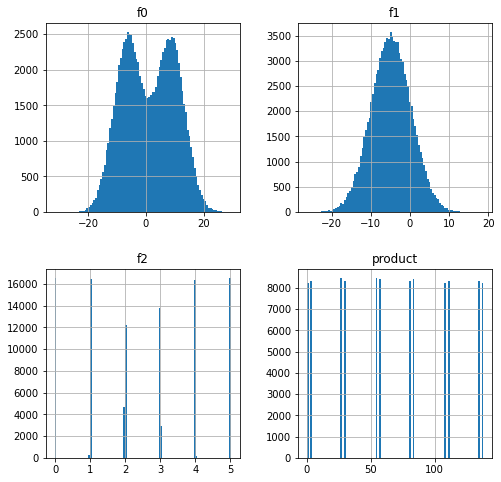

Гистограммы для данных по региону № 3


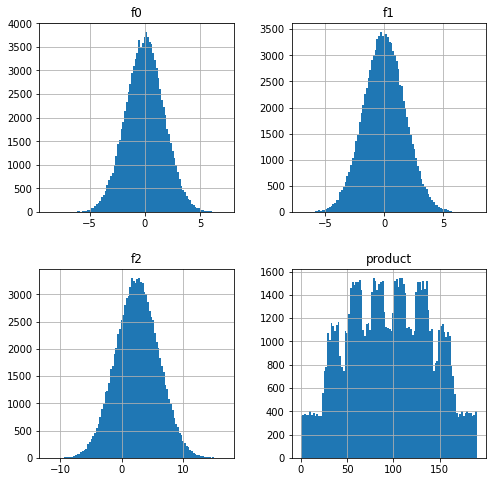

In [5]:
#построим гистограммы для данных
count = 1
for data_fr in df_list:
    print('\033[1m'+'Гистограммы для данных по региону №', count)
    data_fr.hist(bins=100, figsize=(8,8))
    plt.show()
    count += 1

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

### Разделение на обучающую и валидационную выборки

In [6]:
#признаками будут все столбцы, за исключением'id','product'
features_df1 = df1.drop(['id','product'], axis=1) 
features_df2 = df2.drop(['id','product'], axis=1)
features_df3 = df3.drop(['id','product'], axis=1)
#столбец 'product' - целевой признак
target_df1 = df1['product']
target_df2 = df2['product']
target_df3 = df3['product']

In [7]:
#Разделим датасет в пропорции 25:75
features_train_df1, features_valid_df1, target_train_df1, target_valid_df1 = train_test_split(features_df1,\
target_df1, test_size=0.25, random_state=12345)

features_train_df2, features_valid_df2, target_train_df2, target_valid_df2 = train_test_split(features_df2,\
target_df2, test_size=0.25, random_state=12345)

features_train_df3, features_valid_df3, target_train_df3, target_valid_df3 = train_test_split(features_df3,\
target_df3, test_size=0.25, random_state=12345)

Проверим размеры получившихся выборок

In [8]:
#Проверка корректности проведенного разделения
print('Размер обучающей выборки features_train_df1 (признаки):',features_train_df1.shape)
print('Размер обучающей выборки features_train_df2 (признаки):',features_train_df2.shape)
print('Размер обучающей выборки features_train_df3 (признаки):',features_train_df3.shape)
print('Размер валидационной выборки features_valid_df1 (признаки):',features_valid_df1.shape)
print('Размер валидационной выборки features_valid_df2 (признаки):',features_valid_df2.shape)
print('Размер валидационной выборки features_valid_df3 (признаки):',features_valid_df3.shape)
print()
print('Размер обучающей выборки target_train_df1 (целевые признаки):',target_train_df1.shape[0])
print('Размер обучающей выборки target_train_df2 (целевые признаки):',target_train_df2.shape[0])
print('Размер обучающей выборки target_train_df3 (целевые признаки):',target_train_df3.shape[0])
print('Размер валидационной выборки target_valid_df1 (целевые признаки):',target_valid_df1.shape[0])
print('Размер валидационной выборки target_valid_df2 (целевые признаки):',target_valid_df2.shape[0])
print('Размер валидационной выборки target_valid_df3 (целевые признаки):',target_valid_df3.shape[0])

Размер обучающей выборки features_train_df1 (признаки): (75000, 3)
Размер обучающей выборки features_train_df2 (признаки): (75000, 3)
Размер обучающей выборки features_train_df3 (признаки): (75000, 3)
Размер валидационной выборки features_valid_df1 (признаки): (25000, 3)
Размер валидационной выборки features_valid_df2 (признаки): (25000, 3)
Размер валидационной выборки features_valid_df3 (признаки): (25000, 3)

Размер обучающей выборки target_train_df1 (целевые признаки): 75000
Размер обучающей выборки target_train_df2 (целевые признаки): 75000
Размер обучающей выборки target_train_df3 (целевые признаки): 75000
Размер валидационной выборки target_valid_df1 (целевые признаки): 25000
Размер валидационной выборки target_valid_df2 (целевые признаки): 25000
Размер валидационной выборки target_valid_df3 (целевые признаки): 25000


### Нормализация и масштабирование данных

Регион №3 имеет нормальное распределение признаков, распределение признаков для регионов №1 и №2 отличается от нормального. Таким образом, для масштабирования данных в регионе №3 используем StandardScaler, а для нормализации данных в регионах №1 и №2 используем MinMaxScaler

In [9]:
numeric_columns = ['f0', 'f1', 'f2']
#создадим  MinMaxScaler скалер и обучим его на обучающей выборке
scaler = MinMaxScaler()

#преобразуем выборки
scaler.fit(features_train_df1[numeric_columns]) 
features_train_df1[numeric_columns] = scaler.transform(features_train_df1[numeric_columns])
features_valid_df1[numeric_columns] = scaler.transform(features_valid_df1[numeric_columns])

scaler.fit(features_train_df2[numeric_columns]) 
features_train_df2[numeric_columns] = scaler.transform(features_train_df2[numeric_columns])
features_valid_df2[numeric_columns] = scaler.transform(features_valid_df2[numeric_columns])

In [10]:
#создадим StandardScaler скалер и обучим его на обучающей выборке
scaler = StandardScaler()
scaler.fit(features_train_df3[numeric_columns]) 

#преобразуем выборки
scaler.fit(features_train_df3[numeric_columns]) 
features_train_df3[numeric_columns] = scaler.transform(features_train_df3[numeric_columns])
features_valid_df3[numeric_columns] = scaler.transform(features_valid_df3[numeric_columns])

### Вывод по разделу 1

В разделе 1 было выполнено:

- подключены необходходимые для дальнейшей работы библиотеки, модули, метрики;
- ознакомиление с данными;
- данные разделены на обучающую, валидационную;
- выполнено масштабирование и нормализация данных с использованием StandardScaler для региона 3 и MinMaxScaler для регионов 1 и 2

Размер, получившихся выборок для всех регионов составил:

размер features_train = (75000, 3),

размер features_valid = (25000, 3)

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler-ы были обучены только на треине!
</div>

## Обучение и проверка модели

В целях сокращения кода создадим функцию lr_rmse, которая на вход получает выборки из раздела 1 и возвращает предсказания модели по запасам нефти (целевого признака), выводит средний запас нефти для региона, RMSE для региона  

In [11]:
def lr_rmse(features_train, target_train, features_valid, target_valid):
    model = LinearRegression(n_jobs=-1)
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    rmse = (mean_squared_error(target_valid, predicted))**0.5
    print('Cредний предсказанный запас нефти для региона =', predicted.mean().round(2), 'тыс. бар.')
    print('RMSE для данного региона =', rmse.round(2))
    return predicted

### Регион №1

In [12]:
predicted_valid_df1  = lr_rmse(features_train_df1, target_train_df1, features_valid_df1, target_valid_df1)

Cредний предсказанный запас нефти для региона = 92.59 тыс. бар.
RMSE для данного региона = 37.58


### Регион №2

In [13]:
predicted_valid_df2  = lr_rmse(features_train_df2, target_train_df2, features_valid_df2, target_valid_df2)

Cредний предсказанный запас нефти для региона = 68.73 тыс. бар.
RMSE для данного региона = 0.89


### Регион №3

In [14]:
predicted_valid_df3  = lr_rmse(features_train_df3, target_train_df3, features_valid_df3, target_valid_df3)

Cредний предсказанный запас нефти для региона = 94.97 тыс. бар.
RMSE для данного региона = 40.03


### Вывод по разделу 2

В разделе 2 с помощью модели LinearRegression было установлено следующее:
- Cредний предсказанный запас нефти для региона № 1 = 92.59 тыс. бар. RMSE для данного региона = 37.58
- Cредний предсказанный запас нефти для региона №2 = 68.73 тыс. бар. RMSE для данного региона = 0.89
- Cредний предсказанный запас нефти для региона №3 = 94.97 тыс. бар. RMSE для данного региона = 40.03

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

Объявим глобальные переменные, которые будут использоваться в дальнейших вычислениях

In [15]:
RESEARCH_POINT = 500 #Количество точек для исследования
BEST_POINTS = 200 #Количество лучших точек для исследования
BUDGET = 10*10**9 #Бюджет на разработку скважин в регионе в рублях
PRICE_BARREL = 450000 #Доход с единицы продукции в рублях (тыс. бар.)
N_SELECTION = 1000 #Количество выборок для Bootstrap
INTERVAL = 0.95 #Доверительный интервал

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что в названиях константных переменных использовались только большие буквы!
</div>

In [16]:
#Стоимость строительства одной скважины
print('Стоимость бурения одной скважины =', BUDGET/BEST_POINTS, 'руб.')

Стоимость бурения одной скважины = 50000000.0 руб.


In [17]:
#Минимальный объём нефти в скважине, нобходимый для покрытия стоимости её строительства
print('Минимальный объём нефти для покрытия стоимости строительства скважины =',\
      (BUDGET/BEST_POINTS)/PRICE_BARREL, 'тыс. бар.')

Минимальный объём нефти для покрытия стоимости строительства скважины = 111.11111111111111 тыс. бар.


Создадим функцию, которая принимает на входе предсказанные моделью запасы нефти в скважинах и их истинные значения (predictions и target), функция должна осуществить сортировку predictions по убыванию и выбрать 200 (BEST_POINTS) скважин с наибольшим предсказанным запасом нефти. По индексу выбранных в predictions скважин необходимо найти соответствующие им значения целевого признака в target. Функция возвращает прибыль (или убыток) от выбранных в target скважин, которая расчитывается следующим образом: цена единицы объёма (PRICE_BARREL, в рублях за тыс.баррель) * суммарный объём запасов нефти с выбранных в target скважин (тыс. баррелей) - бюджет на создание скважин (BUDGET в рублях) = прибыль(убыток) в рублях.

In [18]:
#Поскольку индексы в валидационных выборках перемешаны, то их необходимо сбросить для установления соответствия с predicted
target_valid_df1.reset_index(drop=True, inplace=True)
target_valid_df2.reset_index(drop=True, inplace=True)
target_valid_df3.reset_index(drop=True, inplace=True)

#Предсказания модели являются массивом numpy.ndarray. 
#Для установления соответствия по индексу между ними и target сделаем из них pd.Series
predicted_valid_df1 = pd.Series(predicted_valid_df1)
predicted_valid_df2 = pd.Series(predicted_valid_df2)
predicted_valid_df3 = pd.Series(predicted_valid_df3)

In [19]:
def profit(target, predictions, count):
    revenue_target_sum = target[predictions.sort_values(ascending=False).index][:count].sum()
    return PRICE_BARREL*revenue_target_sum - BUDGET #Прибыль(убыток) в рублях от count скважин

### Вывод по разделу 3

В разделе 3 были объявлены глобальные переменные, подготовлена функция для расчёта прибыли(убытка). 

В разделе 3 было установлено:
- Стоимость бурения одной скважины = 50000000.00 руб.
- Минимальный объём нефти для покрытия стоимости строительства скважины = 111.11 тыс. бар.

## Расчёт прибыли и рисков 

Напишем функцию и выполним процедуру Bootstrap для трёх регионов

In [20]:
def bootstrap(target, predictions): #Создадим функцию для бутстрепа
    values = []
    loss =0 #Число убыточных экспериментов
    state = np.random.RandomState(12345)
    for i in range(N_SELECTION): #Количество повторений бутстрепа
        #создадим случайную выборку из target с заданным количеством точек для исследования       
        target_subsample = target.sample(n=RESEARCH_POINT, replace=True, random_state=state)
        #Создадим выборку из элементов predictions по индексам элементов target из выборки target_subsample  
        predict_subsample = predictions[target_subsample.index] 
        #Расчитаем значение прибыли(убытка) функцией revenue по target_subsample и predict_subsample для BEST_POINTS скважин
        values_item = profit(target_subsample, predict_subsample, BEST_POINTS)/10**6
        values.append(values_item)  
        if values_item < 0:
            loss +=1 
    
    values = pd.Series(values) #Для расчета среднего преобразуем список в Series
    lower = values.quantile((1-INTERVAL)/2).round(2) #0.025% квантиль
    upper = values.quantile(1-(1-INTERVAL)/2).round(2) #0.975% квантиль
    
    print('Средняя прибыль =', values.mean().round(2), 'млн. руб.')
    print('Доверительный интервал в {} % составляет от {} до {} млн.руб.'.format(INTERVAL*100, lower, upper))
    print('Риск убытков =', loss/N_SELECTION*100, '%')
    return 

Применим процедуру бутстрепа для трёх регионов:

In [21]:
bootstrap(target_valid_df1, predicted_valid_df1)

Средняя прибыль = 425.94 млн. руб.
Доверительный интервал в 95.0 % составляет от -102.09 до 947.98 млн.руб.
Риск убытков = 6.0 %


In [22]:
bootstrap(target_valid_df2, predicted_valid_df2)

Средняя прибыль = 515.22 млн. руб.
Доверительный интервал в 95.0 % составляет от 68.87 до 931.55 млн.руб.
Риск убытков = 1.0 %


In [23]:
bootstrap(target_valid_df3, predicted_valid_df3)

Средняя прибыль = 435.01 млн. руб.
Доверительный интервал в 95.0 % составляет от -128.88 до 969.71 млн.руб.
Риск убытков = 6.4 %


### Вывод по разделу 4

В разделе 4 проведена процедура Bootstrap для трёх регионов. Установлено следующее:

**Для региона №1**

Средняя прибыль = 425.94 млн.руб. Доверительный интервал в 95.0 % составляет от -102.09 до 947.98 млн.руб. Риск убытков = 6.0 %

**Для региона №2**

Средняя прибыль = 515.22 млн.руб. Доверительный интервал в 95.0 % составляет от 68.87 до 931.55 млн.руб. Риск убытков = 1.0 %

**Для региона №3**

Средняя прибыль = 435.01 млн.руб. Доверительный интервал в 95.0 % составляет от -128.88 до 969.71 млн.руб. Риск убытков = 6.4 %

Риски для региона № 2 составляют 1% (для других регионов риск выше 2,5%).
Средняя прибыль для региона №2 выше средней прибыли в регионах №1 и №3. Таким образом, регион №2 является наиболее перспективным для разработки месторождения

## Общий вывод

Для задачи выбора наиболее перспективного регион для бурения скважины было проведено следующее: 

Проведено ознакомление с данными.

Проведено разделение исходных данных на обучающую и валидационную выборки выборки.

Проведено масштабирование и нормализация данных с использованием StandardScaler для региона 3 и MinMaxScaler для регионов 1 и 2

С помощью модели LinearRegression было установлено следующее:

Cредний предсказанный запас нефти для региона № 1 = 92.59 тыс. бар. RMSE для данного региона = 37.58

Cредний предсказанный запас нефти для региона №2 = 68.73 тыс. бар. RMSE для данного региона = 0.89

Cредний предсказанный запас нефти для региона №3 = 94.97 тыс. бар. RMSE для данного региона = 40.03

Минимальный объём нефти для покрытия стоимости строительства скважины = 111.11 тыс. бар.

С помощью процедуры Bootstrap установлено:

**Для региона №1**

Средняя прибыль = 425.94 млн.руб. Доверительный интервал в 95.0 % составляет от -102.09 до 947.98 млн.руб. Риск убытков = 6.0 %

**Для региона №2**

Средняя прибыль = 515.22 млн.руб. Доверительный интервал в 95.0 % составляет от 68.87 до 931.55 млн.руб. Риск убытков = 1.0 %

**Для региона №3**

Средняя прибыль = 435.01 млн.руб. Доверительный интервал в 95.0 % составляет от -128.88 до 969.71 млн.руб. Риск убытков = 6.4 %

**Риски для региона № 2 составляют 1% (для других регионов риск выше 2,5%). Средняя прибыль для региона №2 выше средней прибыли в регионах №1 и №3. Таким образом, регион №2 является наиболее перспективным для разработки месторождения**

